## Title: Milestone1 - Iphone Reviews
## Date: July 10, 2022
## Author: Anjani Bonda

Overview: 

For this project, I will be evaluating the overall response of cell phone reviews of a previous model of the iPhone from the dataset sourced from the Kaggle website. 
Source: https://www.kaggle.com/datasets/grikomsn/amazon-cell-phones-reviews

To be specific, this will be about iphone X/XE/XS/XR models.

I will be analyzing what features of the phones work well and which ones don't. There are different variables and columns, which make up this project. Some of them include the ASIN number, the review title, review body, the date, the helpful review counter and prices paid. My goal is to perform thorough investigation and learn more about the phones.
This is a type of practice that saves money, increases customer service satisfaction, and protects brand loyalty for a company. I believe that this is important for any company that cares about providing a responsible customer service experience, including Apple.
From the graphs, I learned that I can trust the data because there is approximately 140 verified reviews when compared to about 5 unverified reviews. Also, it seems like there are generally positive reviews.
However, in another graph, I found that the graphs do change from one another. This is helpful because it tells me which areas may need extra attention. Finally, I found a number of reviews by the different Item #.


In [1]:
#Load required packages
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import string

In [2]:
#Load dataframes.
items = pd.read_csv('items.csv')
reviews = pd.read_csv('reviews.csv')

In [3]:
#examining the first dataframe.
items.head()

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.00,0.0
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.1,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.99,0.0


In [4]:
#examining the second dataframe.
reviews.head()

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [19]:
#finding all Apple entries within the first df
AP = items['title'].str.lower().str.find('iphone x')!=-1

In [20]:
#Check how many matches exist.
AP.sum()

11

In [21]:
#creating a new df based on the search.
items_df = items.loc[AP]

In [22]:
#Seeing the list of different options.
pd.set_option('display.max_colwidth', None)
items_df['url']

312      https://www.amazon.com/Apple-iPhone-Fully-Unlocked-256GB/dp/B0775451TT
317       https://www.amazon.com/Apple-iPhone-Fully-Unlocked-64GB/dp/B077578W38
318        https://www.amazon.com/Apple-iPhone-GSM-Unlocked-256GB/dp/B0775H5HJW
399      https://www.amazon.com/Apple-iPhone-AT-256GB-Refurbished/dp/B07D6TQP6F
490        https://www.amazon.com/Apple-iPhone-Max-Fully-Unlocked/dp/B07KFNRQ5S
493    https://www.amazon.com/Apple-iPhone-Fully-Unlocked-Renewed/dp/B07KKL5KGG
542         https://www.amazon.com/Apple-iPhone-XR-Fully-Unlocked/dp/B07P6Y8L3F
598            https://www.amazon.com/Apple-iPhone-Max-256GB-Gray/dp/B07RDMLR4V
603               https://www.amazon.com/Apple-iPhone-Xs-Max-64GB/dp/B07RKYQSRB
608             https://www.amazon.com/Apple-iPhone-XS-256GB-Gray/dp/B07RT1X4FJ
718        https://www.amazon.com/Apple-iPhone-64GB-Gray-Unlocked/dp/B081TJFVCJ
Name: url, dtype: object

In [23]:
#merging the two dataframes based on  asin#.
apple_reviews = pd.merge(items_df,reviews, on='asin')
#Dropping nan values.
apple_reviews = apple_reviews.dropna()

In [26]:
#Reviewing the new dataframe
apple_reviews.head()

,asin,brand,title_x,url,image,rating_x,reviewUrl,totalReviews,price,originalPrice,name,rating_y,date,verified,title_y,body,helpfulVotes
0,B0775451TT,Apple,"Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)",https://www.amazon.com/Apple-iPhone-Fully-Unlocked-256GB/dp/B0775451TT,https://m.media-amazon.com/images/I/81yZOQEC+NL._AC_UY218_ML3_.jpg,3.9,https://www.amazon.com/product-reviews/B0775451TT,436,479.0,749.99,Max,1,"November 7, 2018",True,Cracked and does not turn on.,The screen was cracked and the phone did not turn in after 24 hours of charging.,124.0
1,B0775451TT,Apple,"Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)",https://www.amazon.com/Apple-iPhone-Fully-Unlocked-256GB/dp/B0775451TT,https://m.media-amazon.com/images/I/81yZOQEC+NL._AC_UY218_ML3_.jpg,3.9,https://www.amazon.com/product-reviews/B0775451TT,436,479.0,749.99,Hung D Le,1,"November 26, 2018",True,Not a Refurbished Iphone,"It is not a Refurbished iphone, it is activated",120.0
2,B0775451TT,Apple,"Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)",https://www.amazon.com/Apple-iPhone-Fully-Unlocked-256GB/dp/B0775451TT,https://m.media-amazon.com/images/I/81yZOQEC+NL._AC_UY218_ML3_.jpg,3.9,https://www.amazon.com/product-reviews/B0775451TT,436,479.0,749.99,Javier Martínez Hernández,1,"April 20, 2019",True,Possibility to change the phone?,I bought this phone and this is my first picture with the back camera and also when Im tapping look like multitouch. There is any possibility to change the phone?,101.0
3,B0775451TT,Apple,"Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)",https://www.amazon.com/Apple-iPhone-Fully-Unlocked-256GB/dp/B0775451TT,https://m.media-amazon.com/images/I/81yZOQEC+NL._AC_UY218_ML3_.jpg,3.9,https://www.amazon.com/product-reviews/B0775451TT,436,479.0,749.99,Raif Bucar,1,"January 8, 2019",True,Don't buy from this seller.,"This product is falsely labeled as unlocked, it's been 4 weeks since I informed that the phone was still locked and all I get are excuses. Plus, the phone came in a really bad condition, so many scratches you can see them very clearly.",95.0
4,B0775451TT,Apple,"Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)",https://www.amazon.com/Apple-iPhone-Fully-Unlocked-256GB/dp/B0775451TT,https://m.media-amazon.com/images/I/81yZOQEC+NL._AC_UY218_ML3_.jpg,3.9,https://www.amazon.com/product-reviews/B0775451TT,436,479.0,749.99,Dorothy W.,1,"April 16, 2019",True,THIS PHONE WAS NOT PAYED OFF,"I purchased a refurbished iPhone x, it arrived on time, came in clean , and with a charger.... i was excited about this phone because my other phone was stolen 3 months ago, i got a job and saved up to be able to afford a new one. We tried to set up the service with total wireless and the phone kept repeating the message that the sim card was not compatible.... so we bought another sim card and service plan by t mobile and got the same thing.... went into apple the next day to try to see if their was anything wrong with the phone... turns out their was nothing wrong with the phone, but the phone already had another service plan with at&t that wasn't even payed off.... so after wasting 10 hours off my time, and spending $60 (besides the $690 phone price) trying to set this stupid phone up with a service plan... i would review this 0 stars if i could",71.0


In [27]:
#Dropping erroneous/unwanted columns.
del apple_reviews['image']
del apple_reviews['url']
del apple_reviews['reviewUrl']
del apple_reviews['price']
del apple_reviews['name']
del apple_reviews['rating_x']

In [28]:
#Renaming columns.
apple_reviews.columns = ['Item #', 'Brand', 'Model', 'Reviews', 'Price', 'Rating', 'Date', 'Verified', 'Review Title', 'Review',
                 'Helpful']
apple_reviews['Date'] = pd.to_datetime(apple_reviews['Date']) #Reformatting date/time format.
apple_reviews.sample(n=5)

,Item #,Brand,Model,Reviews,Price,Rating,Date,Verified,Review Title,Review,Helpful
1697,B07RT1X4FJ,Apple,"Apple iPhone XS, 256GB, Gray - For AT&T (Renewed)",198,0.00,5,2019-09-03,True,Great buy!,"The phone arrived in perfect condition, no scratches or damage of any kind, actually it's like new. I tested the battery life and it is in excelent condition too. The phone is unlocked as advertised.",1.0
83,B0775451TT,Apple,"Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)",436,749.99,1,2019-06-30,True,Never buy a pre-owned iPhone unless you know the original owner,Sim locked to original GSM owner. Original phone owner iCloud locked phone with find my iPhone after I had it for a day,1.0
76,B0775451TT,Apple,"Apple iPhone X, 256GB, Silver - For AT&T / T-Mobile (Renewed)",436,749.99,3,2019-02-17,True,Charger problems,"The phone is good, only some light visible scratches on the screen, but the charger is defective, doesn’t work properly. The cable seems to be burnt.",3.0
1194,B07KFNRQ5S,Apple,"Apple iPhone Xs Max, 256GB, Space Gray - Fully Unlocked (Renewed)",230,0.00,4,2019-02-15,False,Review,"INTRO I bought the iPhone XS Max on the first day it came out on September 12, 2018. I purchased the 64gb gold model. I have owned other iPhones in the past such as the 6 and 8 plus and many other Apple products. I’ve also had Androids and many different types of PC’s. In this review I will focus on mainly the camera and battery. IDEAL USER The ideal user for the iPhone XS Max would be someone who has owned an iPhone before. The reason I say this is because it has so many similarities to its previous models such as the format of the apps. Also, the shortcuts on this new iPhone are extremely similar to the old generations. CAMERA In my opinion, the iPhone XS Max camera is one of the best and offers amazing advantages. There is this new feature where you can now change the depth of field of a picture that has already been taken. Another plus is that you can do this to photos that have taken by both the front and back camera unlike androids. Some androids can also adjust the depth of field but only before the picture is taken and not after. I use this feature all the time and improves the picture dramatically, making them look professionally taken. BATTERY LIFE The battery life for the iPhone XS Max is the biggest battery that has ever been on a iPhone. It can even last an hour a half longer than its previous model the X. I start off my day with a fully charged phone every day and stream music, watch videos, roam social media for hours and it does not die. It is at a low percentage, but it still has battery. So basically, one full charge can last you the whole day maybe even two. OVERALL Overall, this phone is good phone for anyone who wants to upgrade from their older generation model. The camera will never fail you, it’s the best on the market and offers many editing abilities with the camera. The battery is so big on the XS Max that you won’t always need to carry your charger with you. These are the only things I could talk about in a short review because this phone has so many advantages.",88.0
1703,B07RT1X4FJ,Apple,"Apple iPhone XS, 256GB, Gray - For AT&T (Renewed)",198,0.00,5,2019-11-19,True,Amazing!,"When I say this phone came like new, I mean it actually had 0 scratches on it with 100% battery, so that was a nice surprise. I also confirmed with Apple to make sure the phone was real, It’s possible I I just got an excellent previous owner, but from my experience this was well worth it. A+++",1.0


In [29]:
#Infomation about the numerical columns.
apple_reviews.describe()

,Reviews,Price,Rating,Helpful
count,724.000000,724.000000,724.000000,724.000000
mean,325.430939,189.818425,3.294199,13.440608
std,126.432995,325.421083,1.816756,34.158698
min,1.000000,0.000000,1.000000,1.000000
25%,198.000000,0.000000,1.000000,1.000000
50%,436.000000,0.000000,4.000000,3.000000
75%,436.000000,735.000000,5.000000,8.000000
max,442.000000,749.990000,5.000000,436.000000


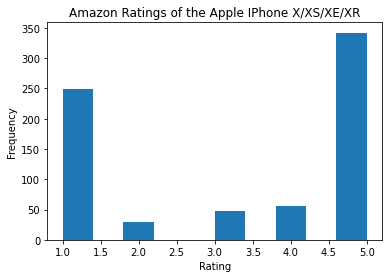

In [35]:
#Graph 1: Histogram for ratings
plt.hist(apple_reviews['Rating'])
plt.title("Amazon Ratings of the Apple IPhone X/XS/XE/XR")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

<AxesSubplot:title={'center':'Amazon Verified Count'}, xlabel='Verified', ylabel='count'>

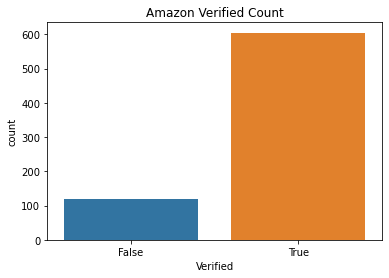

In [31]:
#Graph 2: Histogram for ratings
plt.title('Amazon Verified Count')
sns.countplot(x="Verified", data=apple_reviews)

<AxesSubplot:title={'center':'Amazon Phone Review by Count'}, xlabel='Item #', ylabel='count'>

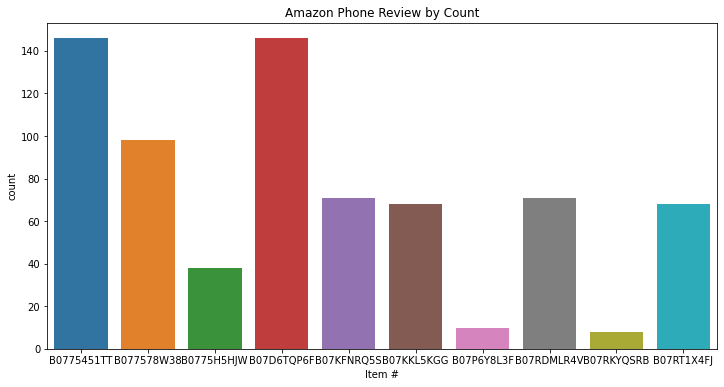

In [32]:
#Graph 3: Item # Count Plot
plt.figure(figsize=(12, 6)) #adjusting the size so it's easily seen.
plt.title('Amazon Phone Review by Count')
sns.countplot(x="Item #", data=apple_reviews)

<AxesSubplot:title={'center':'Amazon Phone Ratings by Count'}, xlabel='Item #', ylabel='Rating'>

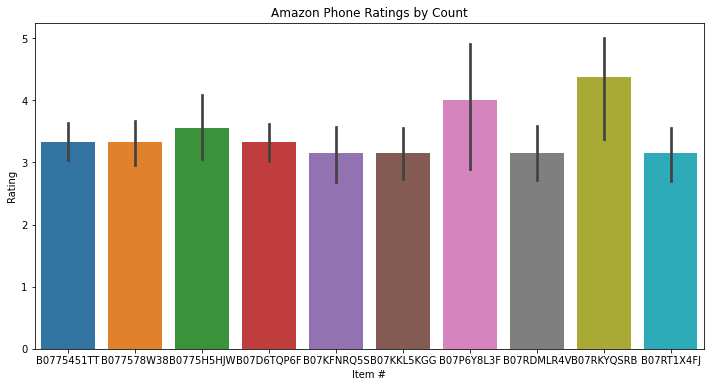

In [33]:
#Graph 4: Item # Count Plot
plt.figure(figsize=(12, 6)) #adjusting the size so it's easily seen.
plt.title('Amazon Phone Ratings by Count')
sns.barplot(x="Item #",y='Rating', data=apple_reviews)